## Python-使用seaborn进行绘图

### 安装seaborn

[官网安装方法](https://seaborn.pydata.org/installing.html)

- pip 或者 conda 都行

```python

pip install seaborn

```

```python
conda install seaborn

```

导入绘图的包package

In [270]:
import numpy as np
import xarray as xr
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from sklearn.preprocessing import MinMaxScaler
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import MaxNLocator

读取两个示例中的nc文件
- 将纬度全部按照正序进行排列
- 读取相同的时间的数据
- 将数据插值到相同分辨率
- 选择相同范围的数据

In [271]:
# 读取 NetCDF 文件
pre_path = r'I://precip.mon.mean.nc'
sst_path = r'I://sst.mon.mean_2016-2020.nc'
ds = xr.open_dataset(pre_path).sortby('lat')
da = xr.open_dataset(sst_path).sortby('lat')

# 选择时间和经纬度范围，并进行插值和填充 NaN 值
pre = (ds.sel(time=slice('2016-01-01', '2020-12-01'), lat=slice(-40, 40), 
             lon=slice(100, 180)).precip.interp(lat=np.arange(-40, 40+2.5, 2.5), 
                                                lon=np.arange(100, 120+2.5, 2.5))).interpolate_na(dim='time', method="linear", fill_value="extrapolate")
sst = da.sel(time=slice('2016-01-01', '2020-12-01'), lat=slice(-40, 40), lon=slice(100, 180)).sst.interp(lat=np.arange(-40, 40+2.5, 2.5), 
                                                lon=np.arange(100, 120+2.5, 2.5)).interpolate_na(dim='time', method="linear", fill_value="extrapolate")

# 提取第一个和最后一个时间点的数据
x1 = sst.sel(time=slice( '2016-01-01', '2017-12-01'   )).values.flatten()
y1 = pre.sel(time=slice( '2016-01-01', '2017-12-01'   )).values.flatten()
x2 = sst.sel(time=slice( '2018-01-01', '2019-12-01'   )).values.flatten()
y2 = pre.sel(time=slice( '2018-01-01', '2019-12-01'   )).values.flatten()


In [275]:
sst

<xarray.DataArray 'sst' (time: 60, lat: 33, lon: 9)> Size: 143kB
array([[[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan, 17.47750092, 17.46625042, ..., 17.50125027,
         17.83250046, 18.00500011],
        [        nan, 19.07625008, 18.83125067, ..., 19.61312485,
                 nan, 19.25499964],
        ...,
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan, 17.64249992, 17.73624992, ..., 18.27124977,
         18.43499947, 18.59000015],
        [        nan, 18.98375034, 18.92437506, ..., 19.8106246 ,
                 nan, 19.91375017],
...
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan, 14.80749989, 14.81125021, ..., 16.22499943,
         16.29999924, 15.93499994],
        [        nan, 16.71875   , 16.37999964, ..., 18.88875008,
                 nan, 18.08812475],
        ...,
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]]])
Coordinates:
  * time     (time) datetime64[ns] 480B 2016-01-01 2016-02-01 ... 2020-12-01
  * lat      (lat) float64 264B -40.0 -37.5 -35.0 -32.5 ... 32.5 35.0 37.5 40.0
  * lon      (lon) float64 72B 100.0 102.5 105.0 107.5 ... 115.0 117.5 120.0
Attributes:
    long_name:     Monthly Means of Global Sea Surface Temperature
    units:         degC
    var_desc:      Sea Surface Temperature
    dataset:       COBE Sea Surface Temperature
    level_desc:    Surface
    statistic:     Mean
    parent_stat:   Individual obs
    actual_range:  [-1.7999996 34.87     ]

In [272]:
pre

<xarray.DataArray 'precip' (time: 60, lat: 33, lon: 9)> Size: 143kB
array([[[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan, 0.37936817, 0.32230664, ..., 1.49198662,
         1.77761642, 1.65576805],
        [       nan, 0.3413042 , 0.44552818, ..., 2.12201199,
         2.39390356, 2.33313475],
        ...,
        [       nan, 0.23459915, 0.25870093, ..., 0.35234489,
         0.31595397, 0.54820631],
        [       nan, 0.09599474, 0.10975094, ..., 0.19125588,
         0.11490454, 0.16020694],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan]],

       [[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan, 1.33177881, 0.80668945, ..., 0.74367078,
         0.81388265, 0.68842488],
        [       nan, 0.60986016, 0.3578318 , ..., 0.51600019,
         0.63378853, 0.5663009 ],
...
        [       nan, 0.46042947, 0.66283993, ..., 2.24546377,
         2.70128405, 2.56921297],
        [       nan, 0.22548803, 0.39689707, ..., 1.69673046,
         2.17495173, 2.44124804],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan]],

       [[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan, 0.28118925, 0.35251549, ..., 0.6083592 ,
         0.5811619 , 0.47671962],
        [       nan, 0.15692808, 0.20027802, ..., 0.33622497,
         0.42589738, 0.45989153],
        ...,
        [       nan, 0.21725461, 0.28278991, ..., 0.35770002,
         0.43695864, 0.60471943],
        [       nan, 0.07644123, 0.10734493, ..., 0.17235834,
         0.25169768, 0.37682975],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan]]])
Coordinates:
  * time     (time) datetime64[ns] 480B 2016-01-01 2016-02-01 ... 2020-12-01
  * lat      (lat) float64 264B -40.0 -37.5 -35.0 -32.5 ... 32.5 35.0 37.5 40.0
  * lon      (lon) float64 72B 100.0 102.5 105.0 107.5 ... 115.0 117.5 120.0
Attributes:
    long_name:     Average Monthly Rate of Precipitation
    valid_range:   [  0. 100.]
    units:         mm/day
    precision:     32767
    var_desc:      Precipitation
    dataset:       GPCP Version 2.3 Combined Precipitation Dataset
    level_desc:    Surface
    statistic:     Mean
    parent_stat:   Mean
    actual_range:  [0.0000000e+00 5.4667444e+29]

## 进行绘图

- 设置图片的字体为新罗马
- 绘制核密度分布图：包括填色图以及柱形图分布图


该填色图同时包含两组数据，一组为2016-2917年的sst和precip；另一组为2018-2019年的sst和precip数据

对于[seabornn.jointplot()](https://seaborn.pydata.org/examples/index.html)函数，需要传递的是两个一维数组，所以需要提取数据进行降维

seaborn中的cmap gallery为：

- https://seaborn.pydata.org/tutorial/color_palettes.html


一个官网的简单的例子

<Axes: >

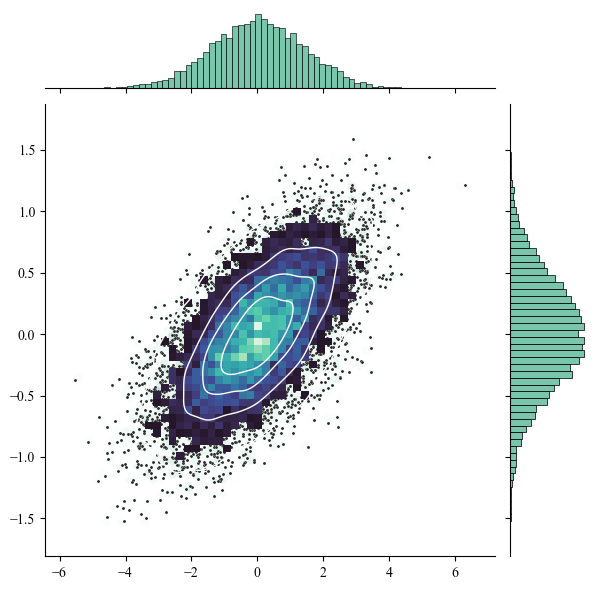

In [273]:
n = 10000
mean = [0, 0]
cov = [(2, .4), (.4, .2)]
rng = np.random.RandomState(0)
x, y = rng.multivariate_normal(mean, cov, n).T
sns.jointplot(x=x, y=y, kind="hex", color="#4CB391")
sns.scatterplot(x=x, y=y, s=5, color=".15")
sns.histplot(x=x, y=y, bins=50, pthresh=.1, cmap="mako")
sns.kdeplot(x=x, y=y, levels=5, color="w", linewidths=1)

下面带入我们上面读取的数据进行绘图，并做出一些调整美化



## 数据解释


- 核密度估计（KDE）：

    KDE 是一种用于估计数据分布的非参数方法。它通过在每个数据点上放置一个核（通常是高斯核）来平滑数据分布。
    在图中，红色和蓝色区域表示数据点的密度。颜色越深，表示该区域的数据点密度越高。

- 边缘直方图：

    边缘直方图显示了 x1、y1、x2 和 y2 的频率分布。
    由于设置了 density=True，直方图显示的是频率占比而不是数量。每个条形的高度表示该区间内数据点的相对频率。

- 颜色条：

    颜色条显示了 KDE 图中颜色与密度值的对应关系。
    通过颜色条，可以直观地理解图中不同颜色区域的密度值。

<Figure size 4500x3000 with 0 Axes>

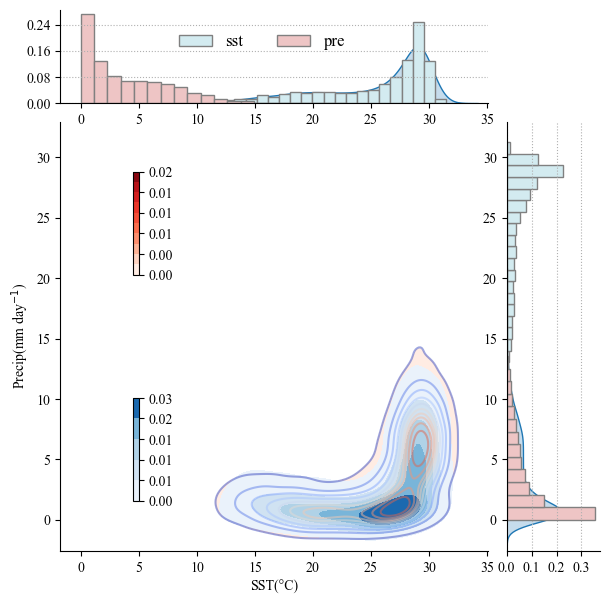

In [276]:

plt.rcParams['font.family'] = 'Times New Roman'
# 创建图形和 GridSpec
fig = plt.figure(figsize=(15, 10), dpi=300)


g = sns.jointplot(
    x=x1, y=y1, 
    fill=True, 
    levels=11, 
    kind="kde", 
    cmap="Reds",
    marginal_ticks=True,
    dropna=True,
    joint_kws={'gridsize':100},
    ratio=4, 
    zorder=1
    ,
    # 设置 hist 图参数
)

sns.kdeplot(x=x1, y=y1, 
            # fill=True,
            levels=11,
            cmap="coolwarm", 
             alpha=0.5,
             ax=g.ax_joint)

sns.kdeplot(x=x2, y=y2, 
            fill=True,
            levels=6,
             cmap="Blues", 
             ax=g.ax_joint) # 在主图上叠加第二组数据的 kde

_ = g.ax_marg_x.hist(x1, bins=20, color="#D3EBF0", edgecolor='gray', label='sst',density=True)
_ = g.ax_marg_x.hist(y1, bins=20, color="#EEC5C5", edgecolor='gray', label='pre',density=True)
_ = g.ax_marg_y.hist(x2, bins=20, color="#D3EBF0", orientation="horizontal", edgecolor='gray', label='2018-2019 X',density=True)
_ = g.ax_marg_y.hist(y2, bins=20, color="#EEC5C5", orientation="horizontal", edgecolor='gray', label='2018-2019 Y',density=True)

# 第一个bar图
g.ax_marg_x.tick_params(labelbottom=True)
g.ax_marg_x.tick_params(labelleft=True)
g.ax_marg_x.grid(True, axis='y', ls=':')
g.ax_marg_x.yaxis.set_major_locator(MaxNLocator(4))

# 第2个bar图

g.ax_marg_y.tick_params(labeltop=False)
g.ax_marg_y.tick_params(labelleft=True)
g.ax_marg_y.grid(True, axis='x', ls=':')
g.ax_marg_y.xaxis.set_major_locator(MaxNLocator(4))

# 设置colorbat的位置 | 显示标签的有效数值
axins1 = inset_axes(g.ax_joint, width="15%", height="60%", loc='upper right', bbox_to_anchor=(0.1, 0.5, 0.1, 0.4), bbox_transform=g.ax_joint.transAxes)
axins2 = inset_axes(g.ax_joint, width="15%", height="60%", loc='lower right', bbox_to_anchor=(0.1, 0.1, 0.1, 0.4), bbox_transform=g.ax_joint.transAxes)

cbar1 = plt.colorbar(g.ax_joint.collections[0], cax=axins1, orientation="vertical")
cbar2 = plt.colorbar(g.ax_joint.collections[2], cax=axins2, orientation="vertical")
cbar1.formatter = FormatStrFormatter('%.2f')
cbar2.formatter = FormatStrFormatter('%.2f')
cbar1.update_ticks()
cbar2.update_ticks()

# 设置轴标签
g.set_axis_labels("SST(°C)", "Precip(mm day$^{-1}$)")


# 添加图例
g.ax_marg_x.legend(loc='upper right',frameon=False,bbox_to_anchor=(0.7, 0.9),ncol=2,prop={'size': 'large'},)


plt.show()